<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/sklearn_nlp_fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# NLP libraries
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [45]:
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
url = """https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url,  encoding = 'unicode_escape')

In [47]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['comment', 'topic']

In [48]:
df.isnull().sum()

comment    0
topic      0
dtype: int64

In [49]:
# Drop na 
df.dropna(axis=0, inplace=True)

In [50]:
df.topic.value_counts()

Service                      1570
APPLICATION (WEB/APP)        1074
SERVICE                       335
CHARGES(BRO./DP/LPC ETC.)     332
Others                        321
NOT SPECIFIED                 254
Not Specified                 216
People                        113
Process                        69
PEOPLE                         32
Product                        13
PROCESS                         6
Name: topic, dtype: int64

In [51]:
#lower case
df['topic'] = df['topic'].str.lower()
df['topic'] = df['topic'].str.strip()
df.loc[df.topic=='not specified', 'topic'] = 'others'

In [52]:
df.topic.unique()

array(['service', 'application (web/app)', 'others',
       'charges(bro./dp/lpc etc.)', 'process', 'people', 'product'],
      dtype=object)

In [53]:
topic_dic = {'application (web/app)': 'application',  'charges(bro./dp/lpc etc.)': 'charges', 'service':'service'
, 'others':'others', 'process':'process', 'people':'people', 'product':'product'}

In [54]:
df['topic'] = df['topic'].map(topic_dic)

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='count', ylabel='topic'>

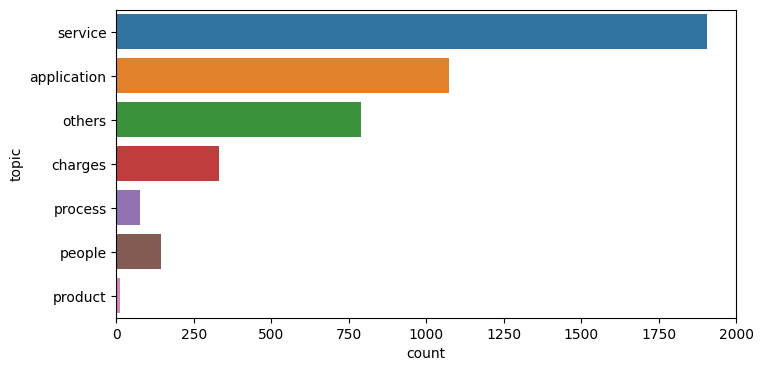

In [55]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['topic'])

In [56]:
# Preprocessing

In [57]:
# Remove integer comments
df = df[df['comment'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['comment'] = df['comment'].str.lower()

In [58]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip)
    text = re.sub(r"[^A-Za-z]+", ' ' , str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [59]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords.remove('no')
lst_stopwords.remove('not')

In [60]:
df["x"] = df["comment"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df['y'] = df['topic']
df.head(10)

,comment,topic,x,y
0,querries where kotak is at disadvantageous pos...,service,querries kotak disadvantageous position either...,service
1,1) same-day money deduction even if we have ma...,application,day money deduction even margin position pleas...,application
2,ndejjejdjx,others,ndejjejdjx,others
3,worst website trading,application,worst website trading,application
4,"no technical support at real time, application...",service,no technical support real time application not...,service
5,need knowledge and experience person,service,need knowledge experience person,service
6,please revisit my brokerage and deemat charges...,charges,please revisit brokerage deemat charge many se...,charges
7,iâm waiting for resolution or a meeting with...,service,waiting resolution meeting mr uday kotak card ...,service
8,i dint interacted so my rating may be a bias b...,service,dint interacted rating may bias better not con...,service
9,no issues with the rm,service,no issue rm,service


In [61]:
df = df[['x', 'y']]

In [62]:
# Prefixing each row of the category column with '__label__'
df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: '__label__' + x)

<ipython-input-62-53fe272f9a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: '__label__' + x)


In [63]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, stratify=df['y'], random_state=0)

In [64]:
import csv

In [65]:
pip install fasttext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import fasttext
# Saving the CSV file as a text file to train/test the classifier
df_train[['y', 'x']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

df_test[['y', 'x']].to_csv('test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")


# Training the fastText classifier
model = fasttext.train_supervised('train.txt',lr=0.5, epoch=25, wordNgrams=2, bucket=200000, dim=50)

# Evaluating performance on the entire test file
model.test('test.txt')                      

# Predicting on a single input
# model.predict(ds.iloc[2, 0])

# Save the trained model
#model.save_model('model.bin')

(1431, 0.8399720475192173, 0.8399720475192173)

In [67]:
model.test('train.txt')

(2904, 0.9986225895316805, 0.9986225895316805)

In [68]:
df_test_pred = df_test
df_test_pred['y_pred'] = df_test_pred['x'].apply(model.predict)
df_test_pred['y_pred']=df_test_pred['y_pred'].str[0:1]
df_test_pred['y_pred'] = df_test_pred['y_pred'].astype(str)
df_test_pred['y_pred'] = df_test_pred['y_pred'].str[12:-5]
df_test_pred['y'] = df_test_pred['y'].str[9:]

In [69]:
df_pred = df
df_pred['y_pred'] = df_pred['x'].apply(model.predict)
df_pred['y_pred'] = df_pred['y_pred'].str[0:1]
df_pred['y_pred'] = df_pred['y_pred'].astype(str)
df_pred['y_pred'] = df_pred['y_pred'].str[12:-5]
df_pred['y'] = df_pred['y'].str[9:]

In [80]:
df

,x,y,y_pred,category_id,category_id_pred
0,querries kotak disadvantageous position either...,service,service,0,3
1,day money deduction even margin position pleas...,application,application,1,0
2,ndejjejdjx,others,others,2,4
3,worst website trading,application,application,1,0
4,no technical support real time application not...,service,service,0,3
...,...,...,...,...,...
4330,please reduce brokerage equity account bangalo...,charges,charges,3,2
4331,waste call resolving issue,service,service,0,3
4332,use le service nnnnnnnnmf,service,service,0,3
4333,sunil,others,others,2,4


In [81]:
# Dict for classes
df_pred['category_id'] = df_pred['y'].factorize()[0]
category_id_df = df_pred[['y', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'y']].values)

In [82]:
df_test_pred['category_id'] = df_test_pred['y'].map(category_to_id) 
df_test_pred['category_id_pred'] = df_test_pred['y_pred'].map(category_to_id) 
df_pred['category_id_pred'] = df_pred['y_pred'].map(category_to_id) 

In [83]:
df_test_pred[df_test_pred['category_id_pred'].isnull()]

,x,y,y_pred,category_id,category_id_pred


In [84]:
df_test_pred.y_pred.unique()

array(['service', 'application', 'others', 'process', 'people', 'charges'],
      dtype=object)

<Axes: >

Text(33.222222222222214, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

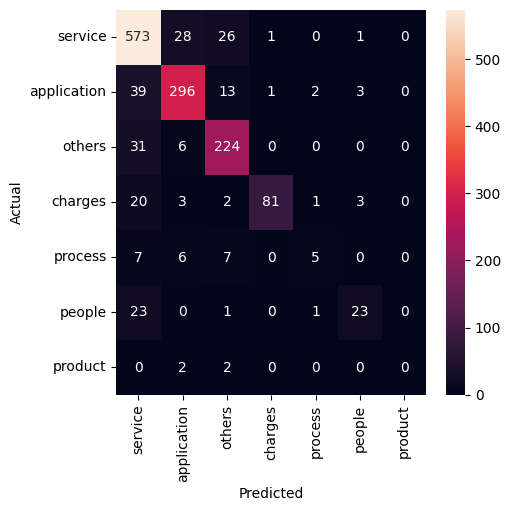

In [85]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(df_test_pred['category_id'], df_test_pred['category_id_pred'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [86]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(df_test_pred['category_id'], df_test_pred['category_id_pred'], target_names=df['y'].unique()))

              precision    recall  f1-score   support

     service       0.83      0.91      0.87       629
 application       0.87      0.84      0.85       354
      others       0.81      0.86      0.84       261
     charges       0.98      0.74      0.84       110
     process       0.56      0.20      0.29        25
      people       0.77      0.48      0.59        48
     product       0.00      0.00      0.00         4

    accuracy                           0.84      1431
   macro avg       0.69      0.57      0.61      1431
weighted avg       0.84      0.84      0.83      1431



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

Text(33.222222222222214, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

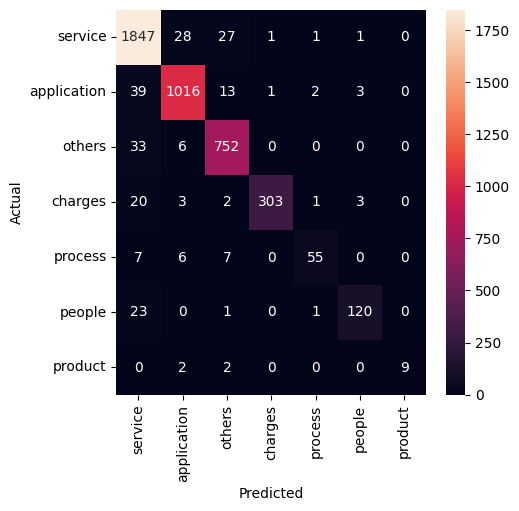

In [87]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(df_pred['category_id'], df_pred['category_id_pred'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
# Classification report overall
from sklearn import metrics
print(metrics.classification_report(df_pred['category_id'], df_pred['category_id_pred'], target_names=df['y'].unique()))

              precision    recall  f1-score   support

     service       0.94      0.97      0.95      1905
 application       0.96      0.95      0.95      1074
      others       0.94      0.95      0.94       791
     charges       0.99      0.91      0.95       332
     process       0.92      0.73      0.81        75
      people       0.94      0.83      0.88       145
     product       1.00      0.69      0.82        13

    accuracy                           0.95      4335
   macro avg       0.96      0.86      0.90      4335
weighted avg       0.95      0.95      0.95      4335



In [94]:
# To manually verify why some failed
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df_pred.query(f' (category_id == {actual}) & (category_id_pred == {predicted})')[['x']])
            print('')

'application' predicted as 'service' : 39 examples.


,x
324,close company take advise zerodha run business...
327,option trading platform convenient call put tr...
555,call waitlist without response
713,no rm provided highly disappointed kotak security
995,abe sale log itna time kon deta hai bhai upar ...
1046,solve app problem also improve customer care s...
1090,close uour neo appglitches faced day yesterday...
1134,please ignore response previous question appea...
1215,understand technical glitch may come last week...
1280,call trade department behave rudely



'others' predicted as 'service' : 33 examples.


,x
480,initial exp asked close ac yet not closed ac
635,bad experience kotak security
687,management aware issue organisation not willin...
759,want close relationship
899,properly message
924,call sir pls
956,good working kotak security implant properly g...
1121,make responce call registerd mobile no immedia...
1122,not even contacted
1184,bad experience year old customer



'charges' predicted as 'service' : 20 examples.


,x
313,kotak charging much compared others gone branc...
1301,please learn others brokerage firm take care c...
1812,kotak charging much compared others gone branc...
2333,requested help team regarding trading charge
2433,say say close account close account not keep a...
2567,better not give margin money facility customer...
2598,nobody else give proper detail debited charge
2749,much charge zero information
3128,pledged sgb kotak security rate charged high p...
3267,came intraday free brokerage year margin short...



'people' predicted as 'service' : 23 examples.


,x
731,no communication end reg customer support
835,thankscalls made kotak security number go unan...
890,allotted rm wont respond call lack knowledge
1150,call center bogus no one responsible people ko...
1386,staff not knowledgeable intention sort query p...
2230,no communication end reg customer support
2326,no query answered cannot get anybody phone abs...
2380,ankita good rest others dont know anything
2469,not sufficient knowledge solve query
2671,query not addressed time bound every query tim...



'service' predicted as 'application' : 28 examples.


,x
266,please improve app also focus redressal issue ...
850,open account representative come query dont co...
875,cannot blame employee decision taken managemen...
1000,appreciate service staff behavior alertness pu...
1283,soon move kotak security shift money broker re...
1765,please improve app also focus redressal issue ...
2378,relation advisor not available critical time r...
2393,transaction email attachment doesnt open gamil...
2537,lost much fund due server problem even custome...
2588,suddenly stock become unavailable trade call n...



'service' predicted as 'others' : 27 examples.


,x
19,feedback already provided way rating
452,noisy call
711,senior mgt spk pl
752,worst ever rd class everything
802,feedback attended much swiftly
1005,accurate transperent
1131,pls pravide quality cc
1476,worst experience ever faced
1517,feedback already provided way rating
1951,noisy call



'application' predicted as 'others' : 13 examples.


,x
826,account report not good like profit loss marge...
874,site must remain open not
888,option training program needed
1200,console profit loss according month
2434,statement requirement sent soon possible
2543,not happy
2778,rectification erroneous demat account no
2982,poorly system manuplatting cutomers
3366,top twenty company suggestion separately watch...
3465,graph not updating



Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from google.colab import data_table
data_table.DataTable(df_pred, include_index=False, num_rows_per_page=10)

In [95]:
df_pred.query('category_id!=category_id_pred')

,x,y,y_pred,category_id,category_id_pred
19,feedback already provided way rating,service,others,0,2
266,please improve app also focus redressal issue ...,service,application,0,1
313,kotak charging much compared others gone branc...,charges,service,3,0
324,close company take advise zerodha run business...,application,service,1,0
327,option trading platform convenient call put tr...,application,service,1,0
...,...,...,...,...,...
4255,dont need recommendation,product,application,6,1
4269,toll free number not answering many time perso...,people,service,5,0
4275,representative informed would no amc charge ac...,charges,service,3,0
4307,hidden chargesxare exorbitantcharges,charges,others,3,2


,x,y,y_pred,category_id,category_id_pred
0,querries kotak disadvantageous position either...,service,service,0,0
1,day money deduction even margin position pleas...,application,application,1,1
2,ndejjejdjx,others,others,2,2
3,worst website trading,application,application,1,1
4,no technical support real time application not...,service,service,0,0
...,...,...,...,...,...
4330,please reduce brokerage equity account bangalo...,charges,charges,3,3
4331,waste call resolving issue,service,service,0,0
4332,use le service nnnnnnnnmf,service,service,0,0
4333,sunil,others,others,2,2
